<a href="https://colab.research.google.com/github/GiuseppeELio/FRESCO-Board/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tqdm import tqdm

In [ ]:
!unzip 2024.zip -d ./

In [45]:
def read_data_from_folders(start_day, start_month, start_year, end_day, end_month, end_year):
    file_paths = []
    for year in range(start_year, end_year + 1):
        for month in range(start_month, 13):
            for day in range(start_day, 32):
        # for month in range(start_month, end_month + 1):
        #     for day in range(start_day, end_day + 1):
                folder_path = os.path.join(f"{year:04d}", f"{month:02d}", f"{day:02d}")
                if os.path.exists(folder_path):
                    file_path = os.path.join(folder_path, "DATA.TXT")
                    if os.path.exists(file_path):
                        file_paths.append(file_path)

    outfname = "DATA_collated.txt"
    lines_seen = set() # hold lines already seen once (i.e., the headers)
    with open(outfname, "w") as outfile:
        for file_path in file_paths:
            for line in open(file_path, "r"):
                if line not in lines_seen:
                    outfile.write(line)
                    lines_seen.add(line)

In [46]:
start_day, start_month, start_year = 8, 7, 2024
end_day, end_month, end_year = 17, 7, 2024

read_data_from_folders(start_day, start_month, start_year, end_day, end_month, end_year)

In [47]:
df = pd.read_csv("DATA_collated.txt", header=0, index_col=0, skipinitialspace=True, parse_dates=True, dayfirst=True) #ugly trick to skip the repeated header line
pd.to_datetime(df.index)
df.describe()

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD1,TPC1,PD2,TPC2,TSet1
count,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000,739753.000000
mean,28.277928,55.458022,29.977018,50.696994,28.901608,48.935261,26.807862,26.240241,27.994281,28.283068,27.568029,39.768531,362.263787,29.971791,6.212681,51.134590,28.671271,41.034254,28.958639,28.277221
std,5.621237,10.842057,6.877942,12.944853,5.858413,14.232557,8.436533,8.343825,8.579988,8.715804,8.029996,3.719903,361.832838,7.873122,4.341077,44.726279,6.337581,39.483594,6.554256,5.623302
min,17.800000,33.200000,17.100000,28.400000,18.000000,22.600000,13.270000,12.870000,14.550000,14.350000,14.450000,30.380000,0.000000,16.570000,-3.630000,0.000000,16.020000,0.000000,15.340000,0.000000
25%,23.300000,46.200000,23.300000,39.900000,23.600000,36.800000,19.070000,18.580000,20.060000,20.160000,20.060000,36.880000,0.000000,22.750000,2.730000,0.000000,23.050000,0.000000,23.130000,23.300000
50%,28.000000,55.200000,30.500000,47.500000,28.700000,47.700000,24.850000,24.750000,26.070000,26.880000,26.470000,40.380000,278.310000,29.010000,5.810000,57.990000,27.910000,43.160000,28.150000,28.000000
75%,33.500000,64.500000,36.500000,61.500000,34.400000,60.600000,35.110000,34.550000,36.580000,37.160000,35.560000,42.560000,730.510000,37.770000,9.430000,87.960000,34.660000,75.140000,35.000000,33.500000
max,39.600000,80.000000,42.500000,81.100000,39.700000,83.700000,42.690000,41.320000,43.570000,43.570000,42.060000,50.130000,1078.630000,45.490000,38.330000,396.890000,40.610000,395.990000,42.560000,39.600000


In [48]:
rw = '0.5H'
dfroll = df.rolling(window=rw).mean()
pd.set_option('plotting.backend', 'matplotlib')

<ipython-input-48-bedda6819270>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfroll = df.rolling(window=rw).mean()


In [49]:
dfroll['ΔT1'] = dfroll['TS1'] - dfroll['TA1']
dfroll['ΔT2'] = dfroll['TS2'] - dfroll['TA1']
dfroll['ΔT3'] = dfroll['TS3'] - dfroll['TA1']
dfroll['ΔT4'] = dfroll['TS4'] - dfroll['TA1']
dfroll['ΔTbx'] = dfroll['Tbx'] - dfroll['TA1']

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


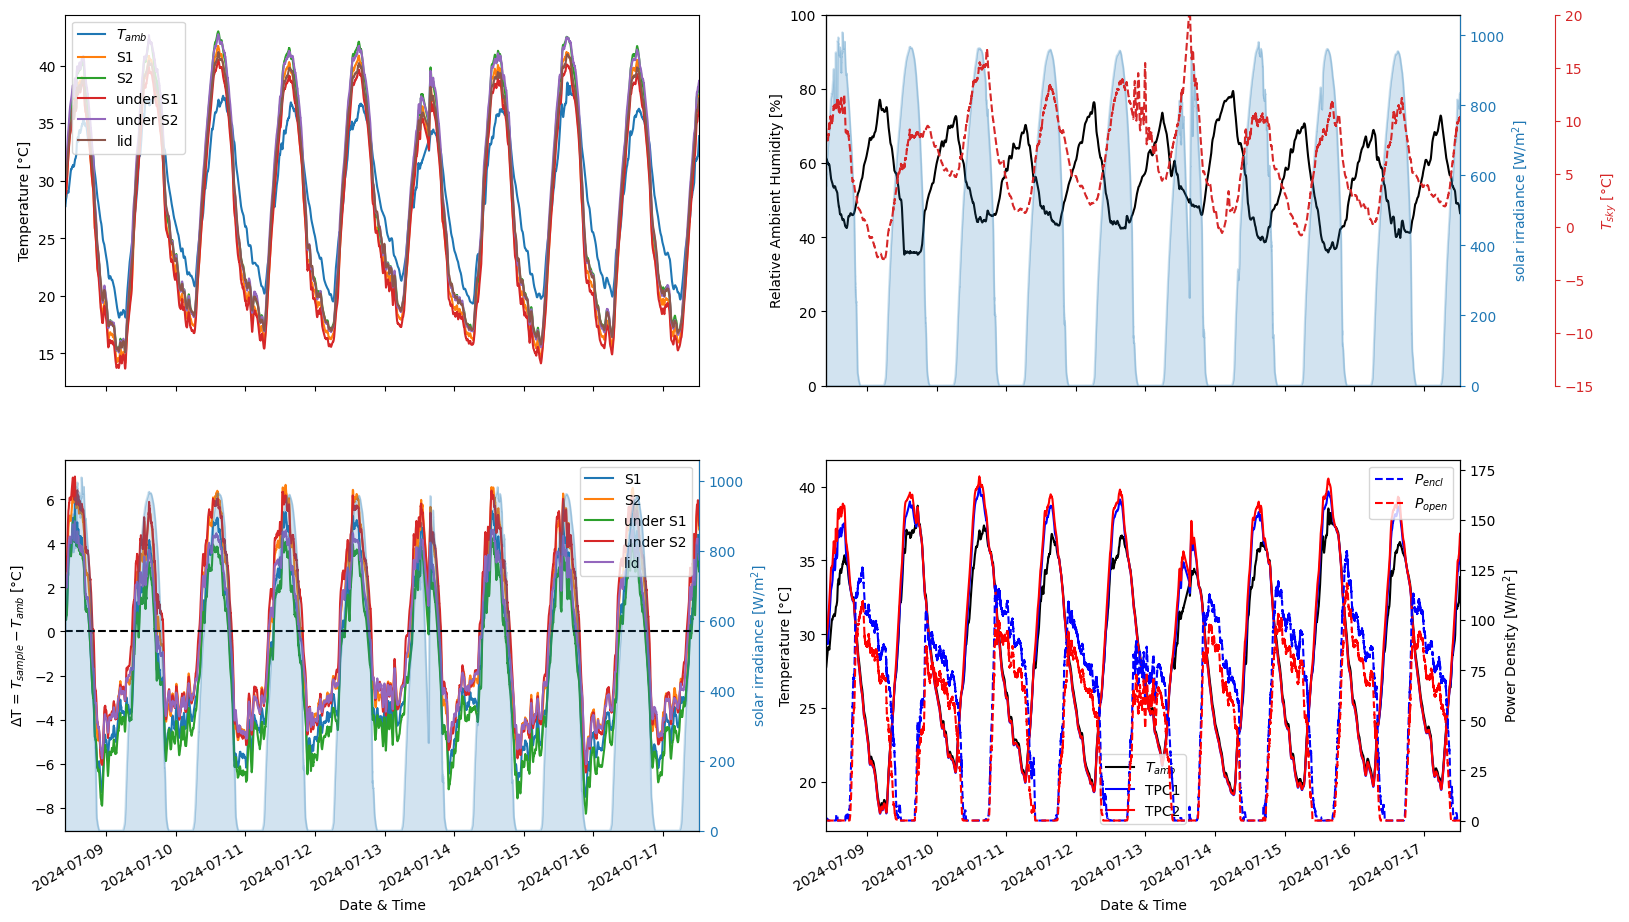

In [50]:
import matplotlib.pyplot as plt

# If needed you can adjust some value such as the irradiance if you system results not well alligned with a weather station
dfroll['Irm'] = dfroll['Ir'] * 1.05

fig, axarr = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(18,12))
#First Plot
dfroll.plot(ax=axarr[0, 0], y=['TA1', 'TS1','TS3', 'TS2', 'TS4','Tbx' ])
axarr[0, 0].legend(['$T_{amb}$','S1','S2','under S1','under S2','lid'], loc='upper left')
axarr[0, 0].set_ylabel('Temperature [°C]')
axarr[0, 0].autoscale(enable=True, axis='x', tight=True)

#Second Plot
ax_irr = axarr[0, 1].twinx()
dfroll.plot(ax=axarr[0, 1], y=['H1'], ylim=(0, 100), legend=False, color=['black'])
axarr[1, 1].set_xlabel('Date & Time')

dfroll.plot.area(ax=ax_irr, y='Irm', alpha=0.2, legend=False)
ax_irr.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4')
ax_irr.spines['right'].set_color('#1f77b4')
ax_irr.tick_params(axis='y', colors='#1f77b4')
axarr[0, 1].set_ylabel('Temperature [°C]')
axarr[0, 1].set_ylabel('Relative Ambient Humidity [%]')
axarr[0, 1].autoscale(enable=True, axis='x', tight=True)

ax_sky = axarr[0, 1].twinx()
dfroll.plot(ax=ax_sky, y='TSIR', ylim=(-15, 20), color='#d62728', legend=False, linestyle='--')
ax_sky.set_ylabel('$T_{sky}$ [°C]', color='#d62728')
ax_sky.spines['right'].set_color('#d62728')
ax_sky.spines['right'].set_position(("axes", 1.15))
ax_sky.tick_params(axis='y', colors='#d62728')

#Third Plot
ax_dif = axarr[1, 0].twinx()
dfroll.plot(ax=axarr[1, 0], y=['ΔT1','ΔT3','ΔT2','ΔT4','ΔTbx'])
dfroll.plot.area(ax=ax_dif, y='Irm', alpha=0.2, legend=False)
axarr[1, 0].axhline(0, ls='--', c='k')
axarr[1, 0].set_ylabel('ΔT = $T_{sample} - T_{amb}$ [°C]')
ax_dif.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4')
axarr[1, 0].set_xlabel('Date & Time')
axarr[1, 0].legend(['S1','S2','under S1','under S2','lid'], loc='upper right')
ax_dif.spines['right'].set_color('#1f77b4')
ax_dif.tick_params(axis='y', colors='#1f77b4')
axarr[1, 0].autoscale(enable=True, axis='x', tight=True)

#Fourth Plot
dfroll.plot(ax=axarr[1, 1], y=['TA1', 'TPC1', 'TPC2'], color=['black', 'blue', 'red', 'green'])
axarr[1, 1].set_ylabel('Temperature [°C]')

ax_pow = axarr[1, 1].twinx()
dfroll.plot(ax=ax_pow, y=['PD1', 'PD2'], color=['blue', 'red'], linestyle='--')
plt.ylim(-5, 180)
#axarr[1, 1].legend(['Pow 3M', 'Pow CS'])
axarr[1, 1].set_xlabel('Date & Time')
ax_pow.set_ylabel('Power Density [W/m$^2$]')

axarr[1, 1].legend(['$T_{amb}$', 'TPC1', 'TPC2'])
ax_pow.legend(['$P_{encl}$', '$P_{open}$'])
axarr[1, 1].autoscale(enable=True, axis='x', tight=True)

<ipython-input-51-6e9434533ef5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
<ipython-input-51-6e9434533ef5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
<ipython-input-51-6e9434533ef5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
<ipython-input-51-6e9434533ef5>:23: FutureW

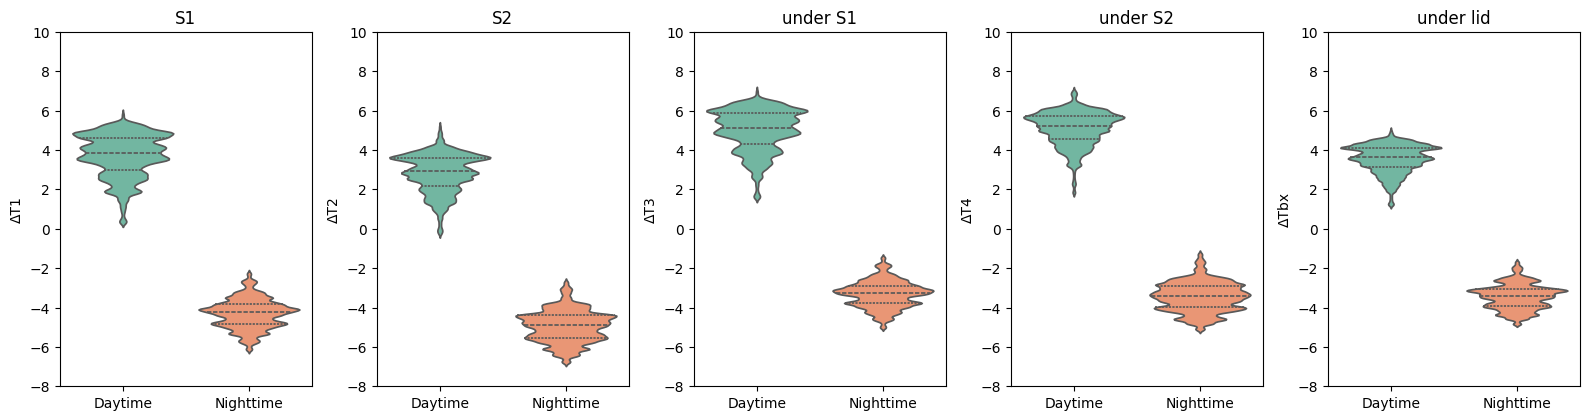

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dfroll' is your dataframe and columns are "ΔT1" through "ΔT4"
day_start_hour, day_end_hour = 11, 16
night_start_hour, night_end_hour = 0, 5

# Create daytime and nighttime masks
day_mask = (dfroll.index.hour >= day_start_hour) & (dfroll.index.hour < day_end_hour)
night_mask = (dfroll.index.hour >= night_start_hour) & (dfroll.index.hour < night_end_hour) if night_start_hour < night_end_hour else (dfroll.index.hour >= night_start_hour) | (dfroll.index.hour < night_end_hour)

# Filter NaN values for each column
column_names = ["ΔT1", "ΔT2", "ΔT3", "ΔT4", "ΔTbx"]
titles = ['S1', 'S2', 'under S1', 'under S2', 'under lid']
daytime_data = {col: dfroll.loc[day_mask, col].dropna() for col in column_names}
nighttime_data = {col: dfroll.loc[night_mask, col].dropna() for col in column_names}

# Create violin plots
plt.figure(figsize=(16, 8))
for i, col in enumerate(column_names):
    plt.subplot(2, len(column_names), i + 1)
    sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
                   y=pd.concat([daytime_data[col], nighttime_data[col]]), inner="quartile", palette="Set2")
    plt.title(titles[i])
    plt.ylim(-8, 10)

plt.tight_layout()
plt.show()

In [52]:
for i, col in enumerate(column_names):
    print(f"{titles[i]}: \t mean daytime ΔT = {daytime_data[col].mean():.1f} \t mean nighttime ΔT = {nighttime_data[col].mean():.1f}")

S1: 	 mean daytime ΔT = 3.7 	 mean nighttime ΔT = -4.3
S2: 	 mean daytime ΔT = 2.8 	 mean nighttime ΔT = -4.9
under S1: 	 mean daytime ΔT = 5.0 	 mean nighttime ΔT = -3.3
under S2: 	 mean daytime ΔT = 5.1 	 mean nighttime ΔT = -3.4
under lid: 	 mean daytime ΔT = 3.5 	 mean nighttime ΔT = -3.4
